In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

In [240]:
#data set and random noise
n = 25
sigma = 1.0
m, b = -5.0, 15.0

np.random.seed(0)
x = np.linspace(-10,10,n)
#y = m * x + b + np.random.normal(0.0, 10.0,n) 
y = m * x + b + np.random.normal(0., sigma, n) # mean , width, number of points

<IPython.core.display.Javascript object>


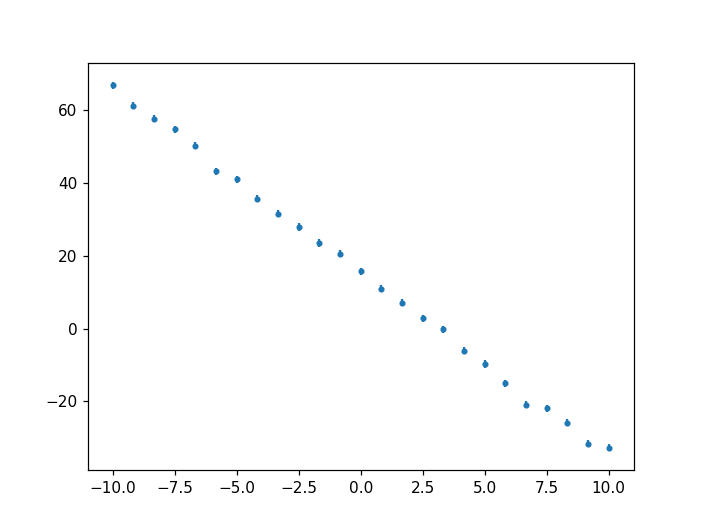

In [241]:
fig = plt.figure('Data Set')
plt.errorbar(x, y, yerr = sigma, fmt='.');

In [242]:
#line function
def f_line(x,m,b): #independent variable goes first (i.e. time, x in this case)
    return m * x +b

In [243]:
def get_chi_squared(x, y, sigma, params):
    '''Returns the chi squared of the fit'''
    RR = 0.0
    #print(sigma)
    for i in range(len(x)):
        y_prime = x[i]*params[0] + params[1]
        RR = RR + ( (y[i] - y_prime)/sigma)**2
    return RR    

In [249]:
N = 10000
init_par = np.array([0.0,0.0])
par_list, RRs = [init_par], [get_chi_squared(x, y, sigma, init_par)]
#my_list = par_list
#print(my_list)
#my_list.append([2.0,2.0])
print(my_list[-1])

for i in range (N):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5)]
    #print(i,par_list)
    RR_test = get_chi_squared(x,y,sigma,test_par)
    #RRs.append(RR_test)
    #par_list.append(test_par)
    #print(par_list[-1])  
    t = (np.random.random() <= (RRs[-1])/RR_test )
    #print(t, RRs[-1],RRs[-1]/RR_test)
    #print(t)
    if t:
        #add new value to array
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        #add value of array
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs) #find min R2
chisq = RR_min
best_i = RRs.index(RR_min) #Get the index
best_pars = par_list[best_i]  #get the parameters  
print("best m = {0}, best b = {1}, chi**2 = {2}, loc = {3}".format(best_pars[0], best_pars[1], RR_min, best_i) ) 
   

[-5.0216348743866615, 14.55185029908095]
best m = -5.051770499854625, best b = 15.4834784772939, chi**2 = 26.356766406851783, loc = 1122


<IPython.core.display.Javascript object>


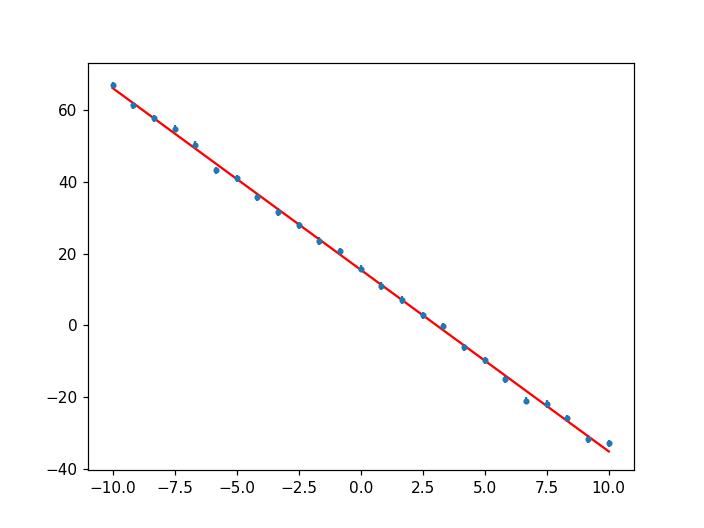

In [250]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(x, y, yerr = sigma, fmt='.')
plt.plot(x,f_line(x,*best_pars),'r')

In [251]:
#check chiq
dof = n - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('Fit Results:\n')
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

Fit Results:

 chi2 =  26.356766406851783 
 dof =  22 
 reduced chi2 =  1.198034836675081 
 p-value =  0.2366798619124598


[[ 0.          0.        ]
 [-0.11251596 -0.02505373]
 [ 0.10330097 -0.17405672]
 ...
 [-5.76246625 17.64059666]
 [-5.87227086 16.84581315]
 [-5.87227086 16.84581315]]


<IPython.core.display.Javascript object>


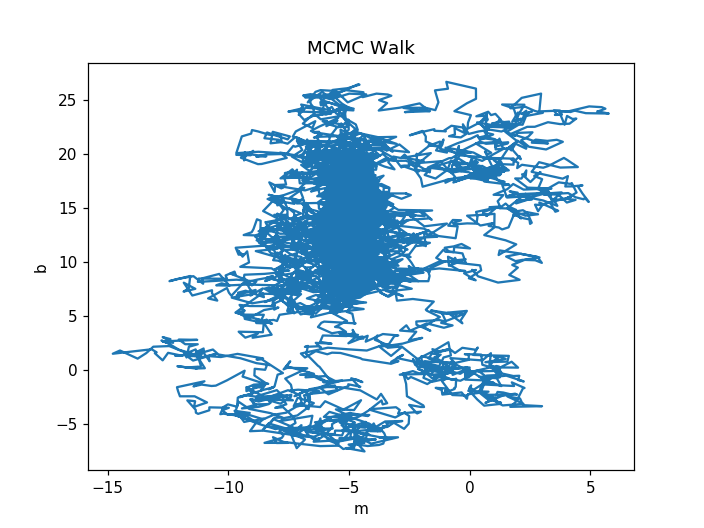

Text(0.5, 1.0, 'MCMC Walk')

In [252]:
# Plot this stuff
ps = np.array(par_list)
print(ps)
fig1 = plt.figure(1)
plt.plot(ps[:,0], ps[:,1])
plt.xlabel("m")
plt.ylabel("b")
plt.title("MCMC Walk")

<IPython.core.display.Javascript object>


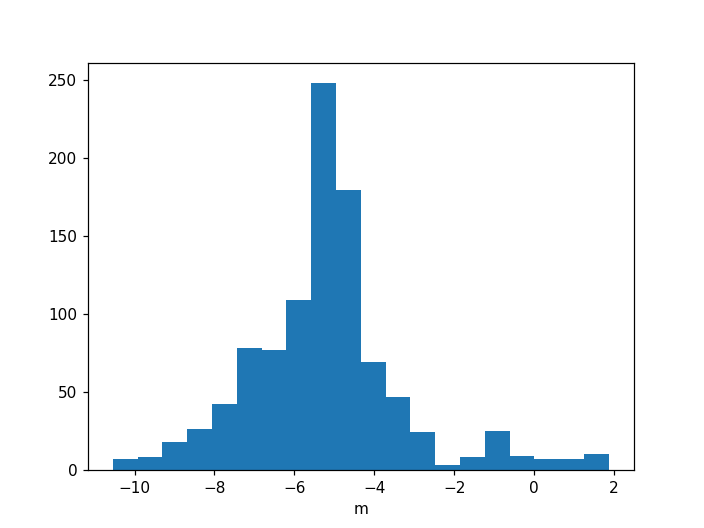

<IPython.core.display.Javascript object>


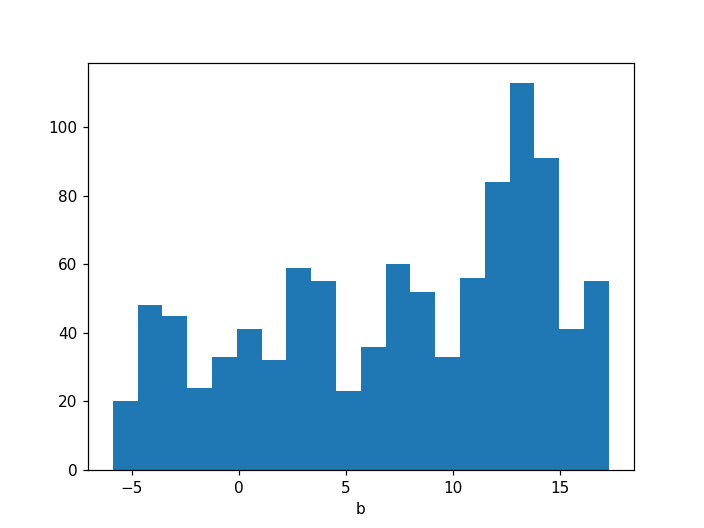

Text(0.5, 0, 'b')

In [248]:
# Plot this stuff

#plt.savefig("param_walk.png")
fig2 = plt.figure(2)
plt.figure(2)
plt.hist(ps[:,0], bins=20)
plt.xlabel("m")
#plt.savefig("param_hist_m.png")

fig3=plt.figure(3)
plt.hist(ps[:,1], bins=20)
plt.xlabel("b")
#plt.savefig("param_hist_b.png")